In [4]:
import torch
import numpy as np
from models.vit_lit import VitModel
import matplotlib.pyplot as plt

In [7]:
model = VitModel.load_from_checkpoint('runs/Vit_minimum/version_13/checkpoints/Vit_minimum-epoch=35-valid_loss=2.49e-04.ckpt')
def generate1():
    a = np.array([np.random.randn()+3,np.random.randn()+3, np.random.randn()-3,np.random.randn()-3])
    a = (a - np.min(a))/(np.max(a)-np.min(a))

    return np.array([np.array(a).reshape(2,2)])

def generate2():
    a = np.array([np.random.randn()-3,np.random.randn()-3, np.random.randn()+3,np.random.randn()+3])
    a = (a - np.min(a))/(np.max(a)-np.min(a))

    return np.array([np.array(a).reshape(2,2)])

data_num = 4
inputs = np.array([ generate1() for _ in range(data_num)] + [ generate2() for _ in range(data_num)])
outputs = np.array([ 0 for _ in range(data_num)] + [ 1 for _ in range(data_num)])




input = torch.tensor(inputs, dtype=torch.float32)
output = torch.tensor(outputs, dtype=torch.int64)

tensor([[-5.7103,  2.8324]], grad_fn=<AddmmBackward0>)

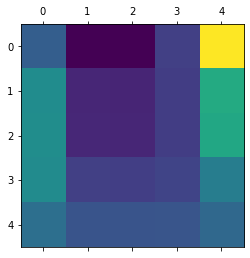

In [14]:
model.eval()
r, w = model(input[[7]])
w = w[0][0,0]
plt.matshow(w.detach().numpy())
r